In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as msno
import numpy as np

from sklearn.feature_selection import mutual_info_classif, f_classif
from sklearn.impute import SimpleImputer

In [3]:
train_path = '../data/adult/adult.data'
test_path = '../data/adult/adult.test'

column_names = [
    'age', 'workclass', 'fnlwgt', 'education', 'education_num', 'marital_status',
    'occupation', 'relationship', 'race', 'sex', 'capital_gain', 'capital_loss',
    'hours_per_week', 'native_country', 'income'
]


df_train = pd.read_csv(train_path, names=column_names, na_values=' ?', skipinitialspace=True)
df_test = pd.read_csv(test_path, names=column_names, na_values=' ?', skipinitialspace=True, skiprows=1)

In [4]:
df_test.head(1)

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K.


In [5]:
df_test['income'] = df_test['income'].str.rstrip('.')

In [6]:
print("Train Data Shape:", df_train.shape)
print("Test Data Shape:", df_test.shape)

print("\nTrain Data Types:\n", df_train.dtypes)

print("\nMissing Values in Train:\n", df_train.isnull().sum())
print("\nMissing Values in Test:\n", df_test.isnull().sum())


Train Data Shape: (32561, 15)
Test Data Shape: (16281, 15)

Train Data Types:
 age                int64
workclass         object
fnlwgt             int64
education         object
education_num      int64
marital_status    object
occupation        object
relationship      object
race              object
sex               object
capital_gain       int64
capital_loss       int64
hours_per_week     int64
native_country    object
income            object
dtype: object

Missing Values in Train:
 age               0
workclass         0
fnlwgt            0
education         0
education_num     0
marital_status    0
occupation        0
relationship      0
race              0
sex               0
capital_gain      0
capital_loss      0
hours_per_week    0
native_country    0
income            0
dtype: int64

Missing Values in Test:
 age               0
workclass         0
fnlwgt            0
education         0
education_num     0
marital_status    0
occupation        0
relationship      0
race  

In [37]:
print("\nNumerical descriptions:")
print(df_train.describe())

print("\nCategorical feature counts:")
for col in df_train.select_dtypes(include='object').columns:
    print(f"\nValue counts for {col}:")
    print(df_train[col].nunique())
    print(df_train[col].value_counts())


Numerical descriptions:
                age        fnlwgt  education_num  capital_gain  capital_loss  \
count  32561.000000  3.256100e+04   32561.000000  32561.000000  32561.000000   
mean      38.581647  1.897784e+05      10.080679   1077.648844     87.303830   
std       13.640433  1.055500e+05       2.572720   7385.292085    402.960219   
min       17.000000  1.228500e+04       1.000000      0.000000      0.000000   
25%       28.000000  1.178270e+05       9.000000      0.000000      0.000000   
50%       37.000000  1.783560e+05      10.000000      0.000000      0.000000   
75%       48.000000  2.370510e+05      12.000000      0.000000      0.000000   
max       90.000000  1.484705e+06      16.000000  99999.000000   4356.000000   

       hours_per_week    income_num  
count    32561.000000  32561.000000  
mean        40.437456      0.240810  
std         12.347429      0.427581  
min          1.000000      0.000000  
25%         40.000000      0.000000  
50%         40.000000     

In [8]:
print("\nNumerical descriptions:")
print(df_test.describe())

print("\nCategorical feature counts:")
for col in df_test.select_dtypes(include='object').columns:
    print(f"\nValue counts for {col}:")
    print(df_test[col].value_counts())


Numerical descriptions:
                age        fnlwgt  education_num  capital_gain  capital_loss  \
count  16281.000000  1.628100e+04   16281.000000  16281.000000  16281.000000   
mean      38.767459  1.894357e+05      10.072907   1081.905104     87.899269   
std       13.849187  1.057149e+05       2.567545   7583.935968    403.105286   
min       17.000000  1.349200e+04       1.000000      0.000000      0.000000   
25%       28.000000  1.167360e+05       9.000000      0.000000      0.000000   
50%       37.000000  1.778310e+05      10.000000      0.000000      0.000000   
75%       48.000000  2.383840e+05      12.000000      0.000000      0.000000   
max       90.000000  1.490400e+06      16.000000  99999.000000   3770.000000   

       hours_per_week  
count    16281.000000  
mean        40.392236  
std         12.479332  
min          1.000000  
25%         40.000000  
50%         40.000000  
75%         45.000000  
max         99.000000  

Categorical feature counts:

Value co

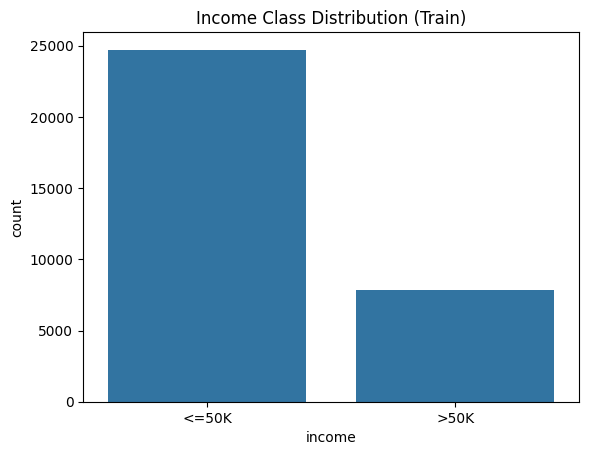

In [9]:
sns.countplot(data=df_train, x='income')
plt.title('Income Class Distribution (Train)')
plt.show()

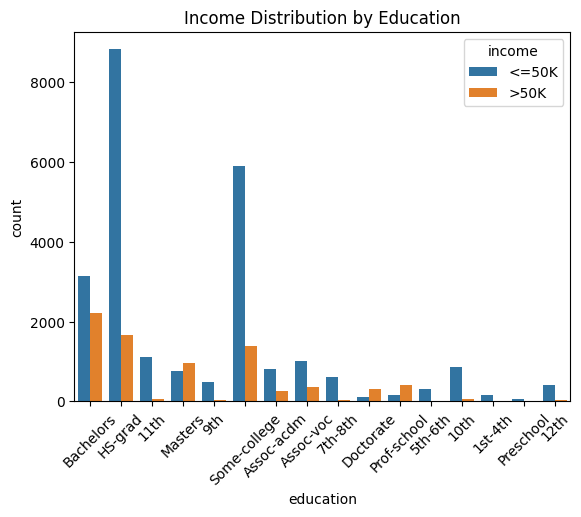

In [10]:
sns.countplot(data=df_train, x='education', hue='income')
plt.xticks(rotation=45)
plt.title('Income Distribution by Education')
plt.show()


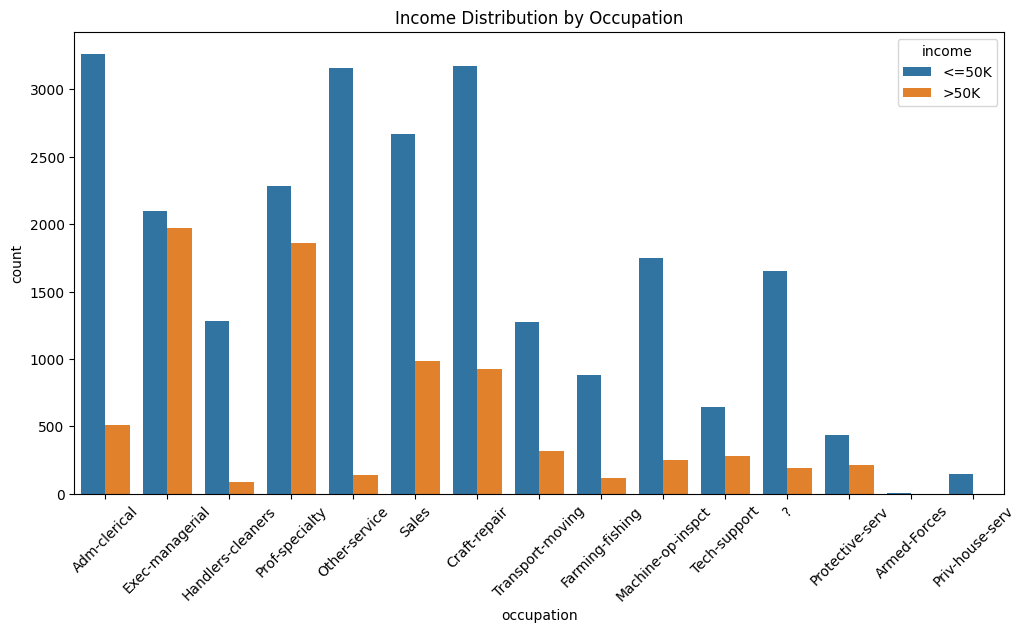

In [11]:
plt.figure(figsize=(12,6))
sns.countplot(data=df_train, x='occupation', hue='income')
plt.xticks(rotation=45)
plt.title('Income Distribution by Occupation')
plt.show()

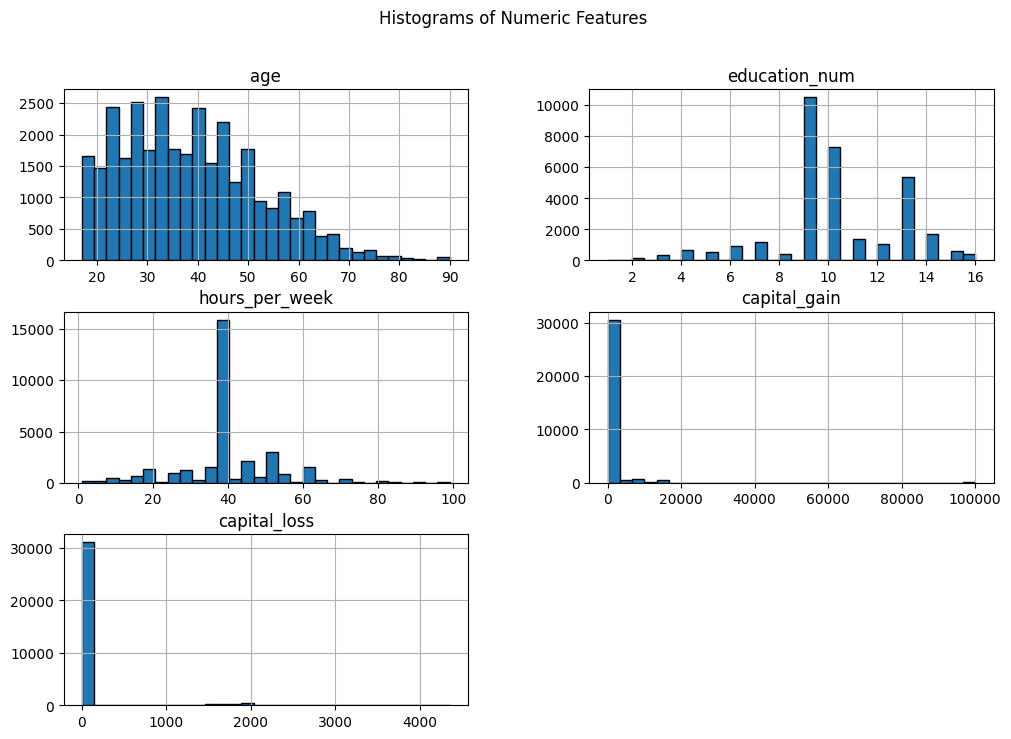

In [12]:
numeric_features = ['age', 'education_num', 'hours_per_week', 'capital_gain', 'capital_loss']

df_train[numeric_features].hist(figsize=(12,8), bins=30, edgecolor='black')
plt.suptitle('Histograms of Numeric Features')
plt.show()

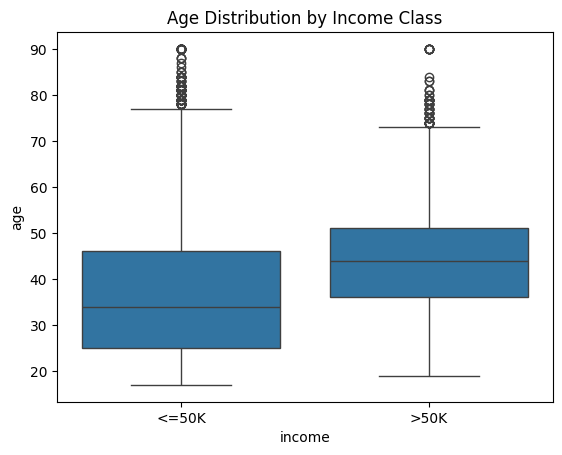

In [13]:
sns.boxplot(data=df_train, x='income', y='age')
plt.title('Age Distribution by Income Class')
plt.show()


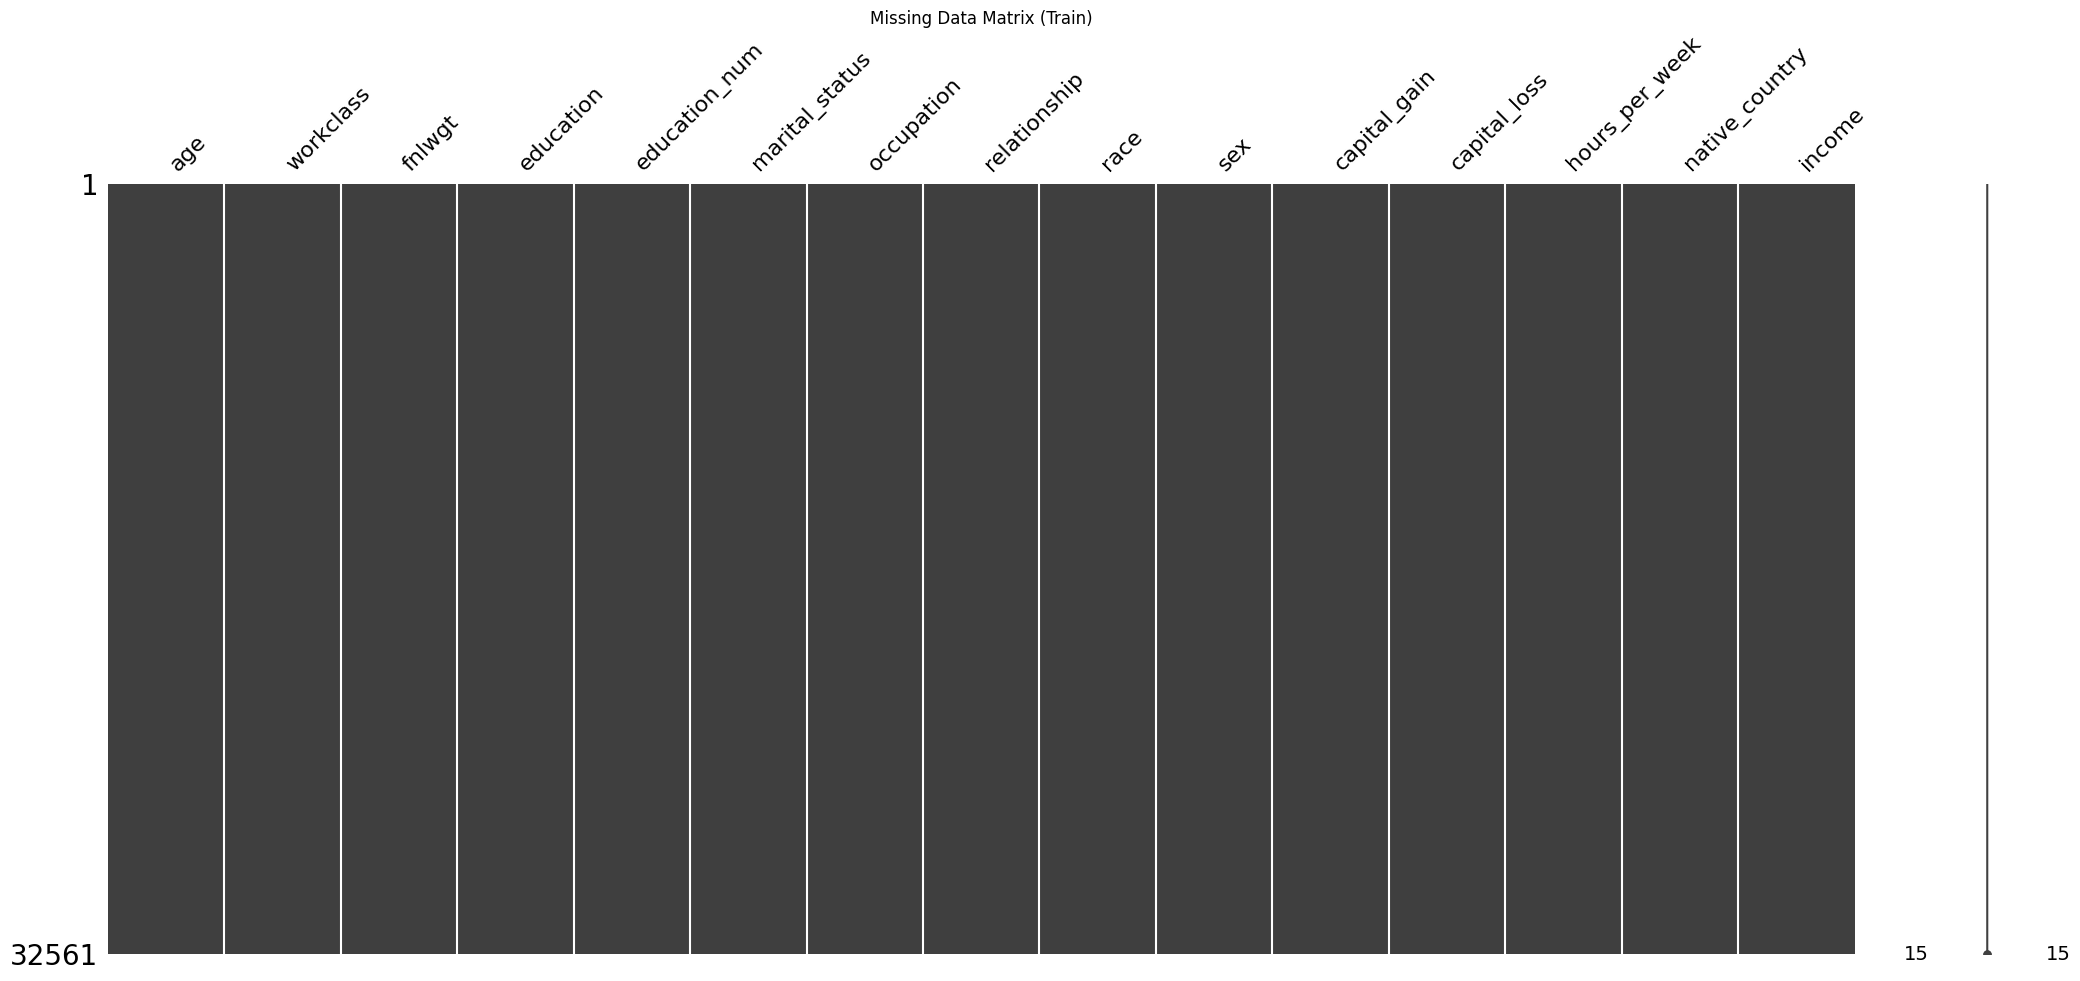

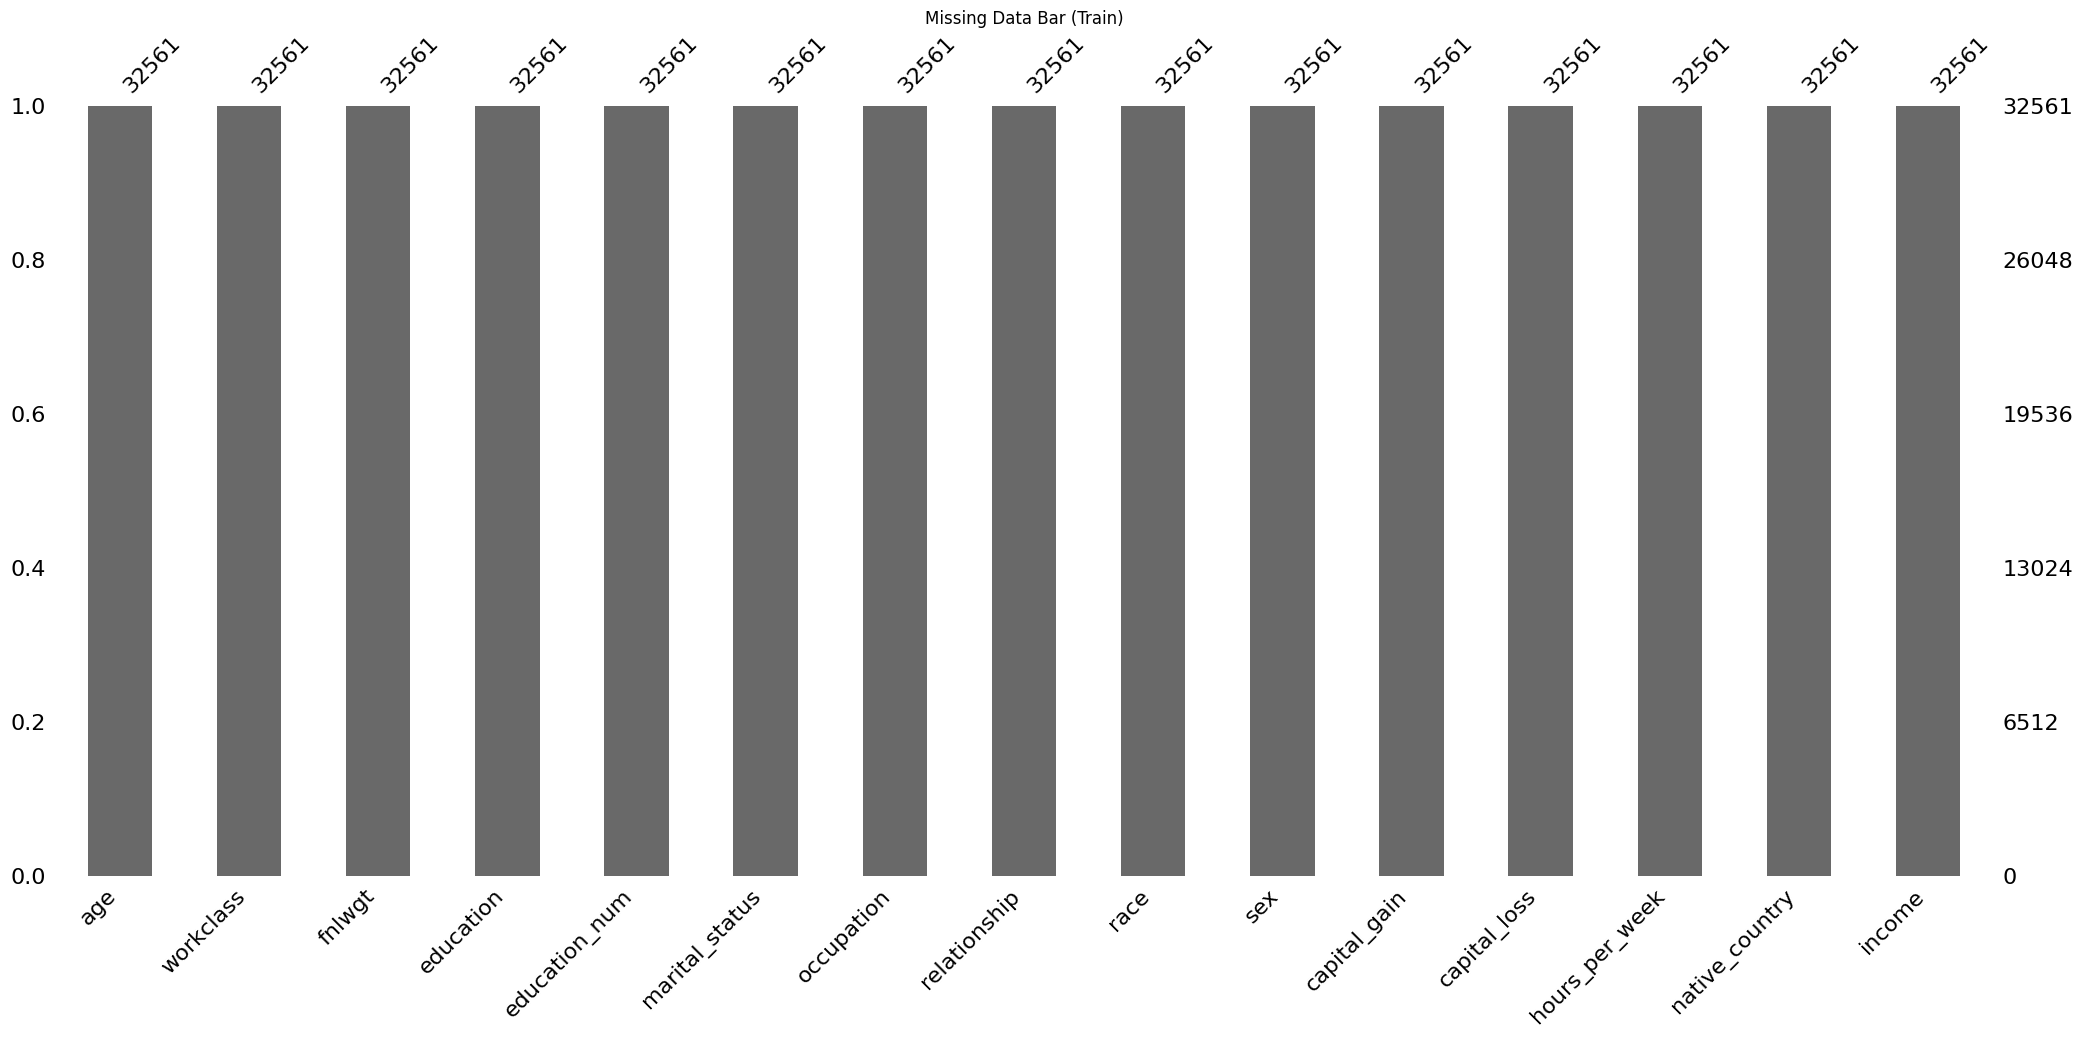

In [14]:
msno.matrix(df_train)
plt.title('Missing Data Matrix (Train)')
plt.show()

msno.bar(df_train)
plt.title('Missing Data Bar (Train)')
plt.show()

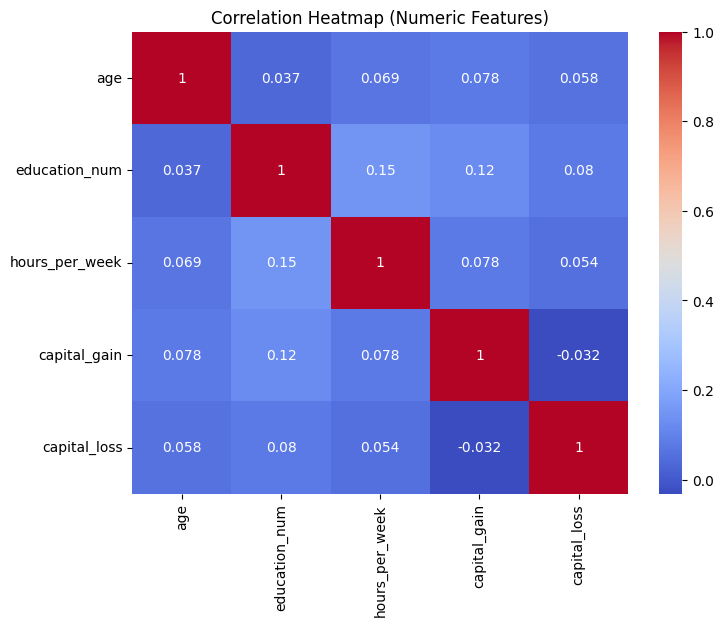

In [15]:
plt.figure(figsize=(8,6))
sns.heatmap(df_train[numeric_features].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap (Numeric Features)')
plt.show()

In [16]:
print("\nAverage hours per week by income:")
print(df_train.groupby('income')['hours_per_week'].mean())

print("\nIncome counts by race:")
print(pd.crosstab(df_train['race'], df_train['income']))


Average hours per week by income:
income
<=50K    38.840210
>50K     45.473026
Name: hours_per_week, dtype: float64

Income counts by race:
income              <=50K  >50K
race                           
Amer-Indian-Eskimo    275    36
Asian-Pac-Islander    763   276
Black                2737   387
Other                 246    25
White               20699  7117


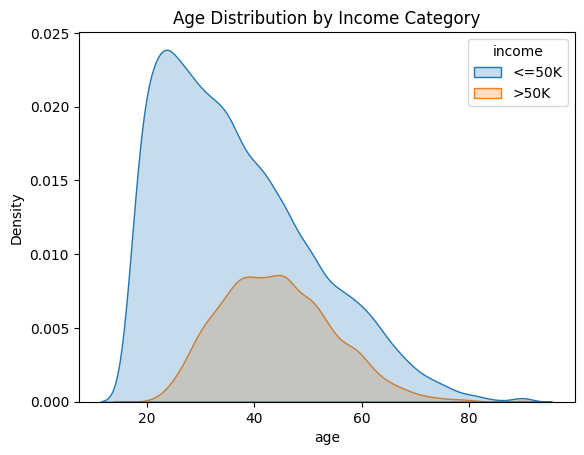

In [17]:
sns.kdeplot(data=df_train, x='age', hue='income', fill=True)
plt.title('Age Distribution by Income Category')
plt.show()

In [18]:
# Income class imbalance
print("Income distribution (%):")
print(df_train['income'].value_counts(normalize=True) * 100)

# All categorical features overview
for col in df_train.select_dtypes(include='object').columns:
    if col != 'income':
        print(f"\n{col}: {df_train[col].nunique()} unique values")
        print(df_train[col].value_counts().head())

Income distribution (%):
income
<=50K    75.919044
>50K     24.080956
Name: proportion, dtype: float64

workclass: 9 unique values
workclass
Private             22696
Self-emp-not-inc     2541
Local-gov            2093
?                    1836
State-gov            1298
Name: count, dtype: int64

education: 16 unique values
education
HS-grad         10501
Some-college     7291
Bachelors        5355
Masters          1723
Assoc-voc        1382
Name: count, dtype: int64

marital_status: 7 unique values
marital_status
Married-civ-spouse    14976
Never-married         10683
Divorced               4443
Separated              1025
Widowed                 993
Name: count, dtype: int64

occupation: 15 unique values
occupation
Prof-specialty     4140
Craft-repair       4099
Exec-managerial    4066
Adm-clerical       3770
Sales              3650
Name: count, dtype: int64

relationship: 6 unique values
relationship
Husband          13193
Not-in-family     8305
Own-child         5068
Unmarried     

In [21]:
df_train['income'] = df_train['income'].astype(str).str.rstrip('.').str.strip()
target_map = {"<=50K": 0, ">50K": 1}
if df_train['income'].dtype == object or df_train['income'].dtype.name == 'category':
    df_train['income_num'] = df_train['income'].map(target_map)
else:
    df_train['income_num'] = df_train['income']

y = df_train['income_num'].astype(int)


In [19]:
num_cols = df_train.select_dtypes(include=[np.number]).columns.tolist()
if 'income_num' in num_cols:
    num_cols.remove('income_num')
cat_cols = df_train.select_dtypes(include=['object', 'category']).columns.tolist()

imp = SimpleImputer(strategy='median')
X_num = pd.DataFrame(imp.fit_transform(df_train[num_cols]), columns=num_cols)
X_num



,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week
0,39.0,77516.0,13.0,2174.0,0.0,40.0
1,50.0,83311.0,13.0,0.0,0.0,13.0
2,38.0,215646.0,9.0,0.0,0.0,40.0
3,53.0,234721.0,7.0,0.0,0.0,40.0
4,28.0,338409.0,13.0,0.0,0.0,40.0
...,...,...,...,...,...,...
32556,27.0,257302.0,12.0,0.0,0.0,38.0
32557,40.0,154374.0,9.0,0.0,0.0,40.0
32558,58.0,151910.0,9.0,0.0,0.0,40.0
32559,22.0,201490.0,9.0,0.0,0.0,20.0


In [23]:
pearson = X_num.corrwith(y).abs().rename('pearson_abs')
pearson.sort_values(ascending=False)


education_num     0.335154
age               0.234037
hours_per_week    0.229689
capital_gain      0.223329
capital_loss      0.150526
fnlwgt            0.009463
Name: pearson_abs, dtype: float64

In [24]:
f_vals, p_vals = f_classif(X_num, y)
f_df = pd.Series(f_vals, index=num_cols, name='f_value')
f_df.sort_values(ascending=False)

education_num     4120.095780
age               1886.707314
hours_per_week    1813.386282
capital_gain      1709.150064
capital_loss       754.830452
fnlwgt               2.915594
Name: f_value, dtype: float64

In [26]:
X_mi = pd.DataFrame()
for c in num_cols:
    X_mi[c] = X_num[c]
for c in cat_cols:
    X_mi[c] = df_train[c].astype('category').cat.codes.fillna(-1).astype(int)

mi = pd.Series(mutual_info_classif(X_mi, y, discrete_features=[c in cat_cols for c in X_mi.columns], random_state=42),
               index=X_mi.columns, name='mutual_info')

mi.sort_values(ascending=False)

income            0.552011
relationship      0.114623
marital_status    0.108497
capital_gain      0.084955
education         0.064872
occupation        0.064409
age               0.063428
education_num     0.062424
hours_per_week    0.046984
capital_loss      0.035623
fnlwgt            0.032925
sex               0.025765
workclass         0.014952
native_country    0.006027
race              0.005807
Name: mutual_info, dtype: float64

In [27]:
def cat_separation(series, y):
    df = pd.DataFrame({'x': series.fillna('**MISSING**'), 'y': y})
    group = df.groupby('x')['y'].agg(['mean','count'])
    prop = group['count'] / group['count'].sum()
    overall = y.mean()
    sep = np.sqrt((prop * (group['mean'] - overall)**2).sum())
    return sep

cat_sep = pd.Series({c: cat_separation(df_train[c], y) for c in cat_cols}, name='cat_separation')

cat_sep.sort_values(ascending=False)

income            0.427575
relationship      0.193942
marital_status    0.191299
education         0.157706
occupation        0.150460
sex               0.092348
workclass         0.076625
race              0.043105
native_country    0.042204
Name: cat_separation, dtype: float64

In [28]:
num_scores = pd.DataFrame({
    'pearson_abs': pearson,
    'f_value': f_df,
    'mutual_info': mi.reindex(num_cols)
}).fillna(0)

num_ranks = num_scores.rank(ascending=False, method='average') / len(num_scores)
num_scores['rank_score'] = num_ranks.mean(axis=1)

num_scores.sort_values(by='rank_score', ascending=False)

,pearson_abs,f_value,mutual_info,rank_score
fnlwgt,0.009463,2.915594,0.032925,1.000000
capital_loss,0.150526,754.830452,0.035623,0.833333
hours_per_week,0.229689,1813.386282,0.046984,0.555556
capital_gain,0.223329,1709.150064,0.084955,0.500000
age,0.234037,1886.707314,0.063428,0.333333
education_num,0.335154,4120.095780,0.062424,0.277778


In [29]:
cat_scores = pd.DataFrame({
    'mutual_info': mi.reindex(cat_cols).fillna(0),
    'separation': cat_sep.reindex(cat_cols).fillna(0)
})
cat_ranks = cat_scores.rank(ascending=False, method='average') / len(cat_scores)
cat_scores['rank_score'] = cat_ranks.mean(axis=1)

cat_scores.sort_values(by='rank_score', ascending=False)

,mutual_info,separation,rank_score
native_country,0.006027,0.042204,0.944444
race,0.005807,0.043105,0.944444
workclass,0.014952,0.076625,0.777778
sex,0.025765,0.092348,0.666667
occupation,0.064409,0.150460,0.555556
education,0.064872,0.157706,0.444444
marital_status,0.108497,0.191299,0.333333
relationship,0.114623,0.193942,0.222222
income,0.552011,0.427575,0.111111


In [32]:
num_final = pd.DataFrame({
    'feature': num_scores.index,
    'type': 'numeric',
    'score': num_scores['rank_score'].values
})
cat_final = pd.DataFrame({
    'feature': cat_scores.index,
    'type': 'categorical',
    'score': cat_scores['rank_score'].values
})
importance_df = pd.concat([num_final, cat_final], ignore_index=True)
importance_df['score_norm'] = (importance_df['score'] / importance_df['score'].max() * 100).round(2)
importance_df = importance_df.sort_values('score_norm', ascending=False).reset_index(drop=True)

importance_df

,feature,type,score,score_norm
0,fnlwgt,numeric,1.000000,100.00
1,race,categorical,0.944444,94.44
2,native_country,categorical,0.944444,94.44
3,capital_loss,numeric,0.833333,83.33
4,workclass,categorical,0.777778,77.78
5,sex,categorical,0.666667,66.67
6,hours_per_week,numeric,0.555556,55.56
7,occupation,categorical,0.555556,55.56
8,capital_gain,numeric,0.500000,50.00
9,education,categorical,0.444444,44.44


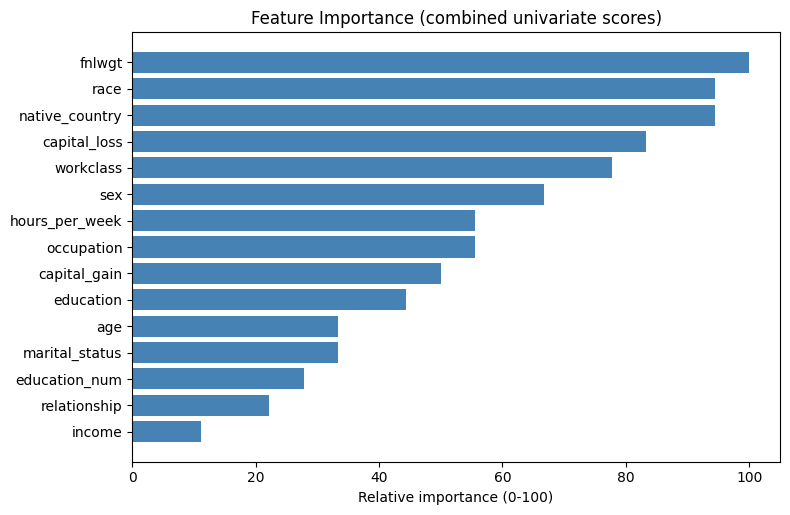

In [34]:
plt.figure(figsize=(8, max(4, 0.35 * min(20, len(importance_df)))))
top = importance_df.head(20).iloc[::-1]
plt.barh(top['feature'], top['score_norm'], color='steelblue')
plt.xlabel('Relative importance (0-100)')
plt.title('Feature Importance (combined univariate scores)')
plt.tight_layout()
plt.show()

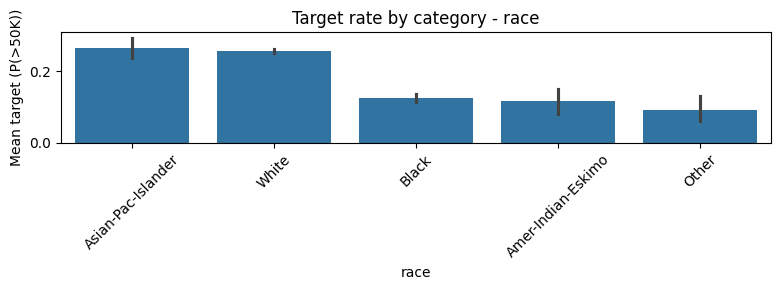

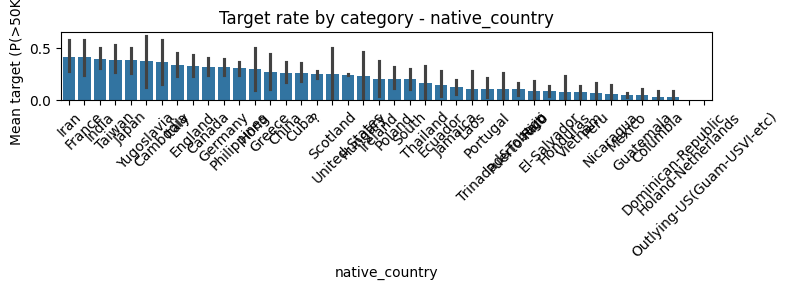

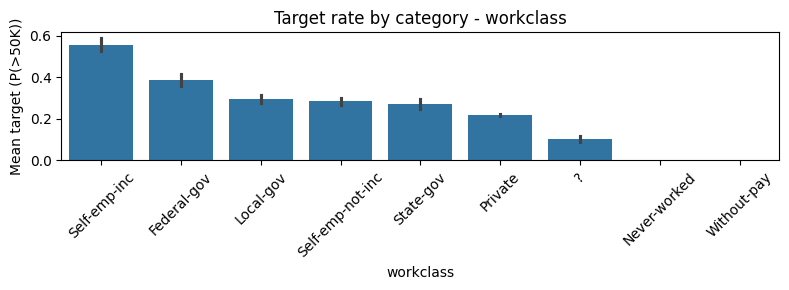

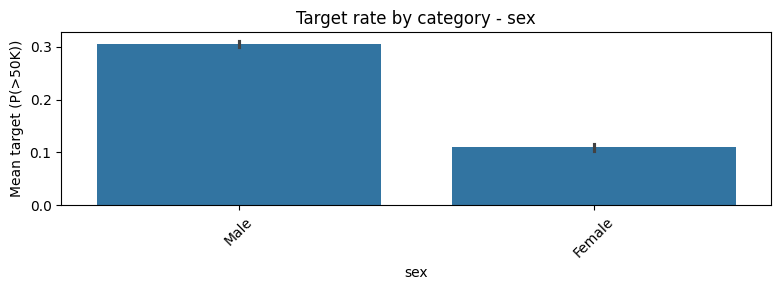

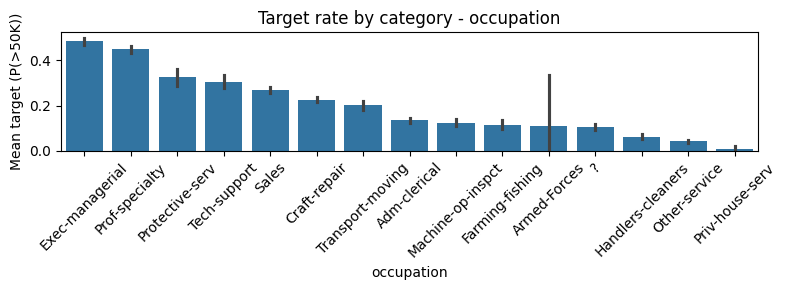

In [35]:
top_cat = importance_df[importance_df['type']=='categorical']['feature'].head(5).tolist()
for c in top_cat:
    plt.figure(figsize=(8,3))
    order = df_train.groupby(c)['income_num'].mean().sort_values(ascending=False).index
    sns.barplot(x=df_train[c], y=df_train['income_num'], order=order, estimator=np.mean)
    plt.xticks(rotation=45)
    plt.ylabel('Mean target (P(>50K))')
    plt.title(f'Target rate by category - {c}')
    plt.tight_layout()
    plt.show()